In [2]:
import pandas as pd
import numpy as np
import bvista as bv

# ✅ Create a sample DataFrame with missing values
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", None, "David", "Eve"],
    "Age": [25, np.nan, 30, None, 28],
    "City": ["New York", "", "Los Angeles", "Chicago", None],
    "Salary": [50000, 60000, np.nan, 55000, ""],
}

df1 = pd.DataFrame(data)




In [16]:
import pandas as pd
import numpy as np


# ✅ Define number of rows & columns
num_rows = 1000  # 100,000 rows
num_cols = 50  # 50 columns

# ✅ Generate random data
data = {
    f"col_{i}": np.random.randint(0, 1000, size=num_rows) if i % 2 == 0 else np.random.random(num_rows)
    for i in range(num_cols)
}

# ✅ Add diverse data types
data["id"] = np.arange(1, num_rows + 1)  # Unique IDs
data["category"] = np.random.choice(["A", "B", "C", "D"], size=num_rows)  # Categorical
data["timestamp"] = pd.date_range("2023-01-01", periods=num_rows, freq="T")  # Datetime
data["boolean"] = np.random.choice([True, False], size=num_rows)  # Boolean
data["text"] = np.random.choice(["hello", "world", "test", "data"], size=num_rows)  # Text column

# ✅ Create DataFrame
df6 = pd.DataFrame(data)




/var/folders/z0/_53pqkc52j94k8cbwvw_qgf40000gn/T/ipykernel_90295/2584171285.py:18: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data["timestamp"] = pd.date_range("2023-01-01", periods=num_rows, freq="T")  # Datetime


In [50]:
df6.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_45,col_46,col_47,col_48,col_49,id,category,timestamp,boolean,text
0,102,0.045219,406,0.624425,678,0.826618,20,0.192023,527,0.366286,...,0.074402,959,0.712471,930,0.486191,1,C,2023-01-01 00:00:00,True,world
1,435,0.026367,618,0.494481,451,0.365596,633,0.666686,226,0.052936,...,0.490371,475,0.079611,205,0.192961,2,B,2023-01-01 00:01:00,False,data
2,860,0.376463,335,0.979551,288,0.353697,69,0.623380,473,0.754933,...,0.733038,594,0.906622,721,0.592599,3,A,2023-01-01 00:02:00,True,data
3,270,0.810553,814,0.144965,140,0.302479,863,0.602469,977,0.955175,...,0.046009,980,0.521929,274,0.544612,4,D,2023-01-01 00:03:00,False,test
4,106,0.987276,116,0.725156,83,0.975373,872,0.489786,540,0.240152,...,0.778273,863,0.904439,594,0.088799,5,C,2023-01-01 00:04:00,False,hello


In [17]:


bv.show(df6)

In [4]:
bv.show(df6)

NameError: name 'df6' is not defined

In [2]:
import pandas as pd
import numpy as np
import bvista as bv

# ✅ Create a sample DataFrame with missing values
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", None, "David", "Eve"],
    "Age": [25, np.nan, 30, None, 28],
    "City": ["New York", "", "Los Angeles", "Chicago", None],
    "Salary": [50000, 60000, np.nan, 55000, ""],
}

df1 = pd.DataFrame(data)




In [18]:

bv.show(df1)

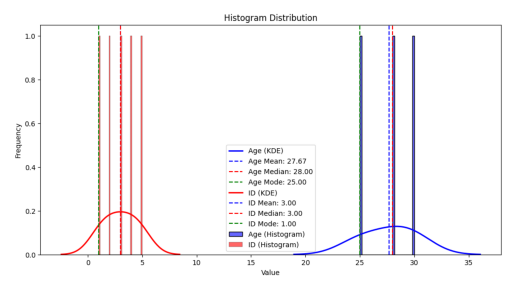

In [3]:
import base64
from io import BytesIO
import matplotlib.pyplot as plt
import requests

# Make the API request
response = requests.post("http://127.0.0.1:5050/api/distribution_analysis",
                         json={"session_id": "df1", 
                               "columns": ["Age", "ID"], 
                               "plot_type": "histogram", 
                               "show_kde": True, 
                               "colors": {"Age": "blue", "ID": "red"}})

# Extract the base64 image
if response.status_code == 200:
    data = response.json()
    base64_image = data.get("image")

    if base64_image:
        # Decode the base64 string
        image_bytes = base64.b64decode(base64_image)
        image_buffer = BytesIO(image_bytes)

        # Display the image
        img = plt.imread(image_buffer, format="png")
        plt.imshow(img)
        plt.axis("off")  # Hide axes
        plt.show()
    else:
        print("No image data received")
else:
    print("Error:", response.json())


In [4]:
print(df1[["Age", "Salary", "ID"]].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     3 non-null      float64
 1   Salary  4 non-null      object 
 2   ID      5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes
None


In [3]:
ds = df1.apply(pd.to_numeric, errors='coerce')
ds.head()

,ID,Name,Age,City,Salary
0,1,NaN,25.0,NaN,50000.0
1,2,NaN,NaN,NaN,60000.0
2,3,NaN,30.0,NaN,NaN
3,4,NaN,NaN,NaN,55000.0
4,5,NaN,28.0,NaN,NaN


In [3]:
python -c "import scipy; import pandas; import numpy; import flask; print('All packages loaded successfully!')"


SyntaxError: invalid syntax (2372822046.py, line 1)

In [4]:
ds.dtypes

ID          int64
Name      float64
Age       float64
City      float64
Salary    float64
dtype: object

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n = 100  # Number of samples

# Perfect positive correlation (+1)
x1 = np.linspace(1, 100, n)
x2 = x1  # Perfectly correlated

# Perfect negative correlation (-1)
x3 = -x1  # Perfectly anti-correlated

# High positive correlation (~0.8)
x4 = x1 * 0.8 + np.random.normal(0, 5, n)

# High negative correlation (~-0.8)
x5 = -x1 * 0.8 + np.random.normal(0, 5, n)

# Low positive correlation (~0.3)
x6 = x1 * 0.3 + np.random.normal(0, 10, n)

# Low negative correlation (~-0.3)
x7 = -x1 * 0.3 + np.random.normal(0, 10, n)

# No correlation (~0.0)
x8 = np.random.normal(50, 25, n)

# Create DataFrame
df7 = pd.DataFrame({
    "Perfect_Positive": x1,
    "Perfect_Negative": x3,
    "High_Positive": x4,
    "High_Negative": x5,
    "Low_Positive": x6,
    "Low_Negative": x7,
    "No_Correlation udhdhdjdjd ndndndjndjdjdjdndjdjdjdj dnhdhndhdhhjd hndhdhdjhdn": x8
})






In [20]:
bv.show(df7)

In [3]:
# droping the index column "unnamed :0"
df2 = pd.read_csv("Advertising.csv", index_col=0)
df2.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
bv.show(df2)

In [9]:
df2.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [37]:
import pandas as pd
import numpy as np
import random
import uuid
from datetime import datetime, timedelta

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate 100 rows of mixed messy data
num_rows = 100

# Generate random dates and times
random_dates = [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365), hours=random.randint(0, 23), minutes=random.randint(0, 59)) for _ in range(num_rows)]
random_strings = ["hello", "world", "random", "data", "test", None, "string123", "45", "special@#$%", "NaN"]
random_categories = ["A", "B", "C", None, "D", "E"]
random_ip_addresses = [f"192.168.1.{random.randint(1, 255)}" for _ in range(num_rows)]

# Constructing the DataFrame with messy data
data = {
    "ID": list(range(1, num_rows + 1)),
    "Name": [random.choice(["Alice", "Bob", "Charlie", "David", None, "Eve", "Frank", "Grace"]) for _ in range(num_rows)],
    "Age": [random.choice([random.randint(18, 70), None]) for _ in range(num_rows)],
    "Salary": [random.choice([random.uniform(30000, 100000), None, "$50000", "NaN"]) for _ in range(num_rows)],
    "City": [random.choice(["New York", "Los Angeles", "Chicago", None, "San Francisco", "Houston"]) for _ in range(num_rows)],
    "Date_of_Joining": random_dates,
    "Last_Login": [random.choice([random.choice(random_dates), "NaN", None]) for _ in range(num_rows)],
    "Boolean_Column": [random.choice([True, False, "yes", "no", None, "True", "False"]) for _ in range(num_rows)],
    "Category_Column": [random.choice(random_categories) for _ in range(num_rows)],
    "IP_Address": random_ip_addresses,
    "Email": [random.choice(["test@example.com", "user@gmail.com", None, "random@data.com", "invalid-email"]) for _ in range(num_rows)],
    "Currency_Column": [random.choice(["$100.50", "€200.00", "¥3000", None, "£50", "CHF 75.75"]) for _ in range(num_rows)],
    "Percentage_Column": [random.choice(["50%", "75%", "100%", None, "25%", "NaN"]) for _ in range(num_rows)],
    "Mixed_Column": [random.choice(["123", "hello", None, 456, "78.9", "NaN", "False", "$500", "%20", "string"]) for _ in range(num_rows)],
    "List_Column": [random.choice([[1, 2, 3], ["a", "b", "c"], None, "random", "string", ["%", "$", "€"]]) for _ in range(num_rows)],
    "Dict_Column": [random.choice([{"key": "value"}, None, {"num": 123}, "invalid"]) for _ in range(num_rows)],
    "UUID_Column": [str(uuid.uuid4()) if random.random() > 0.1 else None for _ in range(num_rows)],
}

# Create DataFrame
df_messy = pd.DataFrame(data)




In [38]:

bv.show(df_messy)

In [39]:
import pandas as pd
import numpy as np
import json

# Create a highly dirty dataset with multiple data types
dirty_data = {
    "int_col": [1, "two", None, 4, np.nan, 6, "?", 8, None, 10],  # Mixed integers and strings
    "float_col": [1.5, None, 3.2, np.nan, 5.0, "six", 7.89, "?", 9.0, None],  # Mixed floats and strings
    "str_col": ["apple", None, "banana", "123", np.nan, "cherry", "42.5", "data", None, "grape"],  # Strings mixed with numbers
    "bool_col": [True, False, None, True, np.nan, "yes", "no", 1, 0, None],  # Boolean with mixed representations
    "datetime_col": [
        pd.Timestamp("2023-01-01"), "2023/02/15", None, pd.NaT, 
        "15-03-2023", "April 1, 2023", "2023-05-10 12:30", np.nan, "invalid_date", pd.Timestamp("2023-06-20")
    ],  # Mixed datetime formats
    "timedelta_col": [pd.Timedelta(days=1), "2 days", None, "NaT", "5 hours", pd.NaT, "invalid", "30 min", "1 week", "6 days"],  # Mixed timedelta
    "category_col": pd.Categorical(["A", "B", None, "D", np.nan, "E", "F", "B", "C", "D"]),  # Categories with missing values
    "currency_col": ["$10.00", "$20.50", None, np.nan, "$50.00", "€30.00", "£15.75", "100.00 USD", "invalid", "$5.99"],  # Currency formatted
    "percentage_col": ["25%", "50%", None, np.nan, "100%", "33.33%", "0.85", "invalid", "75%", "10%"],  # Percentage formatted
    "json_col": [
        '{"name": "Alice", "age": 25}', None, '{}', '{"city": "NY"}', 
        np.nan, '[1, 2, 3]', '{"nested": {"key": "value"}}', "invalid_json", '["a", "b", "c"]', None
    ],  # JSON and lists
    "mixed_col": [1, "two", 3.5, None, "NaN", True, "False", pd.Timestamp("2023-04-10"), None, {"key": "value"}]  # Mixed types
}

# Convert to DataFrame
dirty_df = pd.DataFrame(dirty_data)

# Display the DataFrame



In [6]:
dirty_df.head(14)

,int_col,float_col,str_col,bool_col,datetime_col,timedelta_col,category_col,currency_col,percentage_col,json_col,mixed_col
0,1,1.5,apple,True,2023-01-01 00:00:00,1 days 00:00:00,A,$10.00,25%,"{""name"": ""Alice"", ""age"": 25}",1
1,two,None,None,False,2023/02/15,2 days,B,$20.50,50%,None,two
2,None,3.2,banana,None,None,None,NaN,None,None,{},3.5
3,4,NaN,123,True,NaT,NaT,D,NaN,NaN,"{""city"": ""NY""}",None
4,NaN,5.0,NaN,NaN,15-03-2023,5 hours,NaN,$50.00,100%,NaN,NaN
5,6,six,cherry,yes,"April 1, 2023",NaT,E,€30.00,33.33%,"[1, 2, 3]",True
6,?,7.89,42.5,no,2023-05-10 12:30,invalid,F,£15.75,0.85,"{""nested"": {""key"": ""value""}}",False
7,8,?,data,1,NaN,30 min,B,100.00 USD,invalid,invalid_json,2023-04-10 00:00:00
8,None,9.0,None,0,invalid_date,1 week,C,invalid,75%,"[""a"", ""b"", ""c""]",None
9,10,None,grape,None,2023-06-20 00:00:00,6 days,D,$5.99,10%,None,{'key': 'value'}


In [41]:
import pandas as pd
import numpy as np
import json

# Generate a highly complex and diverse DataFrame
data = {
    "int_col": [1, 2, None, 4, np.nan, -100, 9999999],
    "float_col": [1.5, None, 3.2, np.nan, 5.0, -10.75, 3.141592],
    "str_col": ["apple", None, "banana", "cherry", np.nan, "123", "special_char_!@#"],
    "bool_col": [True, False, None, True, np.nan, False, True],
    "datetime_col": [
        pd.Timestamp("2023-01-01"),
        None,
        pd.NaT,
        pd.Timestamp("2023-04-01"),
        pd.NaT,
        pd.Timestamp("1999-12-31"),
        pd.Timestamp("2050-06-15 12:45:30")
    ],
    "timedelta_col": [
        pd.Timedelta(days=1),
        None,
        pd.NaT,
        pd.Timedelta(days=4, hours=5, minutes=30),
        pd.NaT,
        pd.Timedelta(seconds=3600),
        pd.Timedelta(weeks=3)
    ],
    "category_col": pd.Categorical(["A", "B", None, "D", np.nan, "E", "F"]),
    "currency_col": ["$10.00", "$20.50", None, "NaN", "€50.00", "£100.75", "¥5000"],
    "percentage_col": ["25%", "50%", None, "NaN", "100%", "12.5%", "87.3%"],
    "json_col": [
        json.dumps({"key": "value"}),
        json.dumps({"number": 123}),
        None,
        json.dumps({"bool": True}),
        json.dumps({"list": [1, 2, 3]}),
        json.dumps({"nested": {"a": 1, "b": [4, 5, 6]}}),
        json.dumps({"special_chars": "!@#$%^&*()"})
    ],
    "mixed_col": [10, "string", None, 3.5, True, pd.Timestamp("2025-01-01"), {}],
}

# Create DataFrame
df_complex = pd.DataFrame(data)




In [42]:
bv.show(df_complex)